In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.svm import SVC

df = pd.read_csv("datasets/wildfires_training.csv")
test_df = pd.read_csv("datasets/wildfires_test.csv")
data = df.to_numpy()
test_data = test_df.to_numpy()
scaler = StandardScaler()

X_train = scaler.fit_transform(data[:, 1:])
y_train = data[:, 0]

X_test = scaler.transform(test_data[:, 1:])
Y_test = test_data[:, 0]

This is my first run of SVC using default params.
Kernel = rbf (default)
C = 1.0 (default)

In [8]:
model = SVC()
model.fit(X_train, y_train)

predicted_Y = model.predict(X_test)

accuracy = accuracy_score(Y_test, predicted_Y)
conf_matrix = confusion_matrix(Y_test, predicted_Y)
recall = recall_score(Y_test, predicted_Y, pos_label='yes')
precision = precision_score(Y_test, predicted_Y, pos_label='yes')

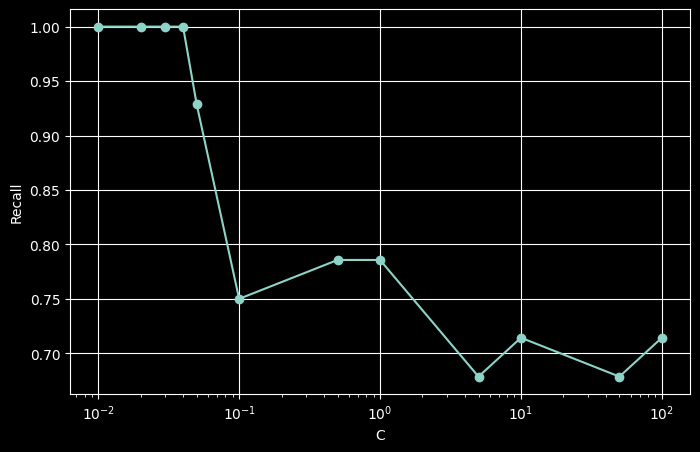

In [14]:
C_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
recall_results = []

for C in C_values:
    model = SVC(C=C)
    model.fit(X_train, y_train)
    predicted_Y = model.predict(X_test)
    recall = recall_score(Y_test, predicted_Y, pos_label='yes')
    recall_results.append(recall)

plt.figure(figsize=(8, 5))
plt.semilogx(C_values, recall_results, marker='o')
plt.xlabel('C')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

In [16]:
model = SVC(C=0.05)
model.fit(X_train, y_train)
predicted_Y = model.predict(X_test)

accuracy = accuracy_score(Y_test, predicted_Y)
conf_matrix = confusion_matrix(Y_test, predicted_Y)
recall = recall_score(Y_test, predicted_Y, pos_label='yes')
precision = precision_score(Y_test, predicted_Y, pos_label='yes')

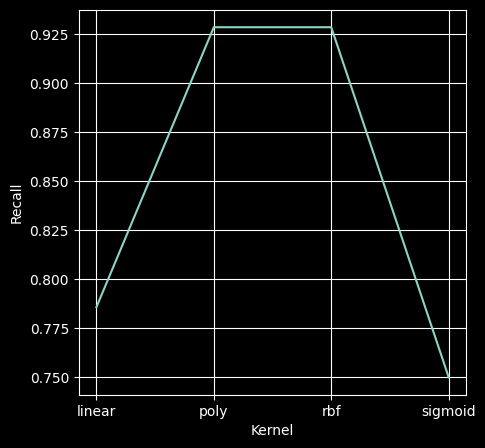

In [18]:
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
recall_results = []

for kernel in kernel_types:
    model = SVC(C=0.05, kernel=kernel)
    model.fit(X_train, y_train)
    predicted_Y = model.predict(X_test)
    recall = recall_score(Y_test, predicted_Y, pos_label='yes')
    recall_results.append(recall)

plt.figure(figsize=(5, 5))
plt.plot(kernel_types, recall_results)
plt.xlabel('Kernel')
plt.ylabel('Recall')
plt.grid(True)
plt.show()